# Atomic number density of the simulation
**(MD2reflect version 0.15)**

In [1]:
# Run this cell if this notebook is in another folder than the module
import sys
sys.path.append("..")

In [2]:
from md2reflect import *

## Calculation by element contributions

### Load the trajectory file

In [3]:
import os

In [4]:
traj=load_trajectory(os.path.join("..", "simulations", "traj3.dcd"), 
                     filename_topology = os.path.join("..", "simulations", "traj3_first_frame.pdb"), 
                     skip_frames=400)

<mdtraj.Trajectory with 26 frames, 29764 atoms, 3028 residues, and unitcells>
[    0   400   800  1200  1600  2000  2400  2800  3200  3600  4000  4400
  4800  5200  5600  6000  6400  6800  7200  7600  8000  8400  8800  9200
  9600 10000]
Loading time: 0:00:00.495324 (hh:mm:ss)


### Define binning

In [5]:
zbin_interval, box_zlength, zbins_number, zbin_volume = select_zbinning(traj, 
                                                                        zbin_interval=0.5, 
                                                                        zbins_number=None)

Length of simulation box in x direction:  49.85000133514404 Å
Length of simulation box in y direction:  49.85000133514404 Å
Length of simulation box in z direction:  160.0 Å 

Thickness of z slices:  0.5 Å
Number of z bins:  320
Volume of z bins:  1242.51127243042 Å^3


(If a "zbins_number" value is specified, it takes precedence over the "zbin_interval".)

### Count number of atoms and number density of each element

In [6]:
number_atoms_elements_allframes = count_number_atoms(traj, zbins_number)
number_density_elements_allframes = calculate_number_density_elements(number_atoms_elements_allframes, 
                                                                      zbin_volume)

0:00:00.166418 (hh:mm:ss.ss) for one frame. 
There are 25 frames left. 
Estimated running time: 0:00:04.326868 (hh:mm:ss.ss)

Actual running time: 0:00:04.508941 (hh:mm:ss.ss)



### Plot and save number density of elements

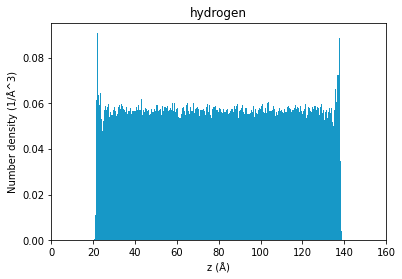

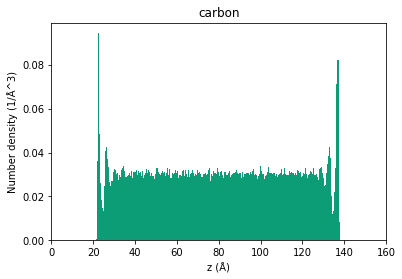

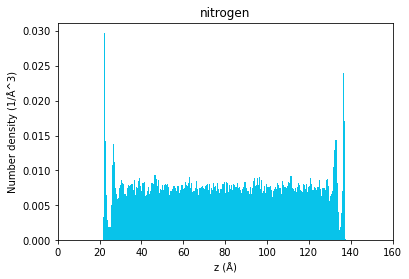

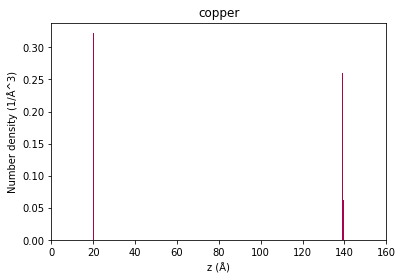

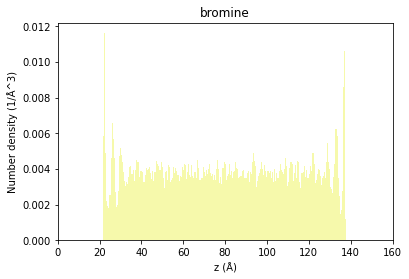

In [7]:
save_number_density(number_density_elements_allframes, zbin_interval, show=True)

There are five elements in the simulation, hence, we get five different graphs. The copper figure evidences that it is the electrode element.

-----

## Calculation by atom type contributions

### Loading the trajectory file

In [8]:
traj=load_trajectory(os.path.join("..", "simulations", "traj3.dcd"), 
                     filename_topology = os.path.join("..", "simulations", "traj3_first_frame.pdb"), 
                     skip_frames=400)

<mdtraj.Trajectory with 26 frames, 29764 atoms, 3028 residues, and unitcells>
[    0   400   800  1200  1600  2000  2400  2800  3200  3600  4000  4400
  4800  5200  5600  6000  6400  6800  7200  7600  8000  8400  8800  9200
  9600 10000]
Loading time: 0:00:00.471799 (hh:mm:ss)


### Define binning

In [9]:
zbin_interval, box_zlength, zbins_number, zbin_volume = select_zbinning(traj, 
                                                                        zbin_interval=0.5)

Length of simulation box in x direction:  49.85000133514404 Å
Length of simulation box in y direction:  49.85000133514404 Å
Length of simulation box in z direction:  160.0 Å 

Thickness of z slices:  0.5 Å
Number of z bins:  320
Volume of z bins:  1242.51127243042 Å^3


### Count number of atoms and number density of each atom type

In [10]:
number_atoms_types_allframes = count_number_atoms_types(traj, zbins_number)
number_density_atom_types_allframes = calculate_number_density_atom_types(number_atoms_types_allframes, 
                                                                          zbin_volume)

0:00:00.176059 (hh:mm:ss.ss) for one frame. 
There are 25 frames left. 
Estimated running time: 0:00:04.577534 (hh:mm:ss.ss)

Actual running time: 0:00:04.488395 (hh:mm:ss.ss)



### Plot and save number density of each atom type

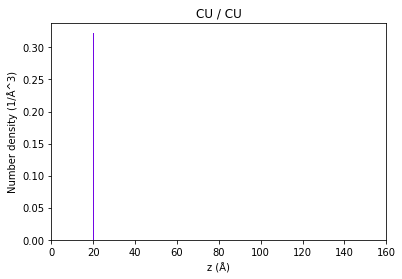

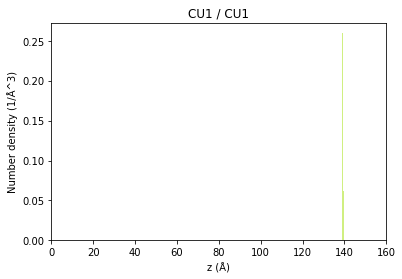

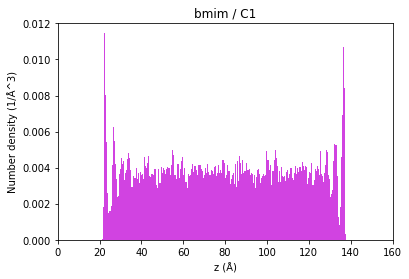

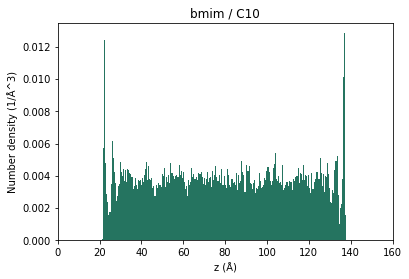

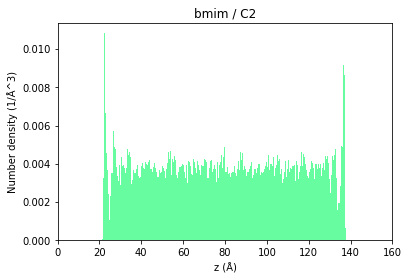

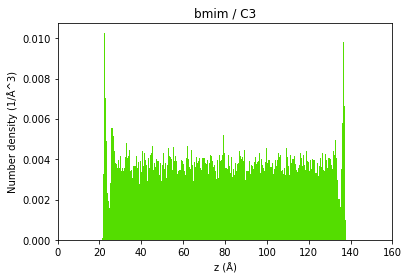

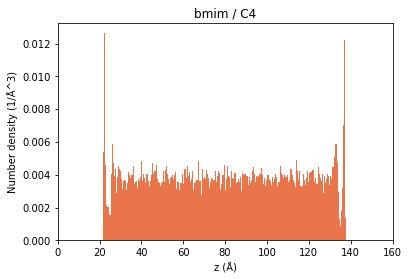

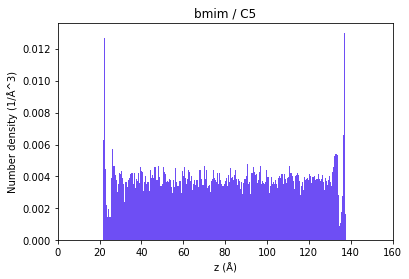

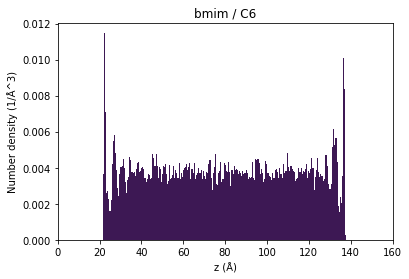

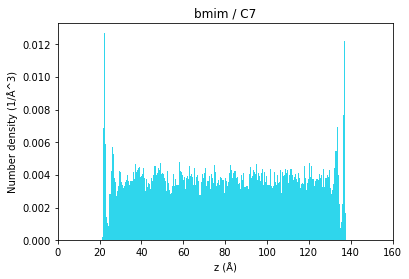

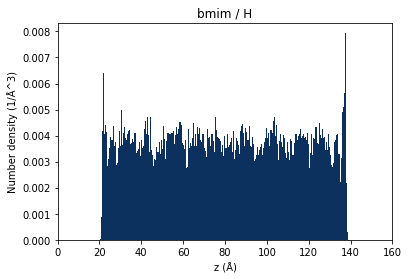

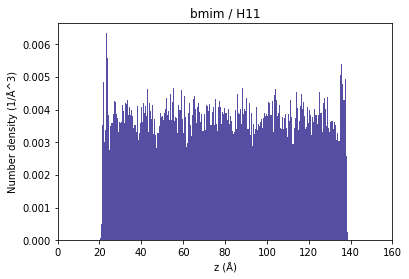

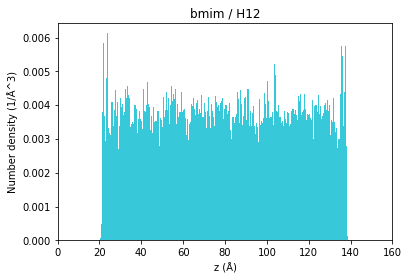

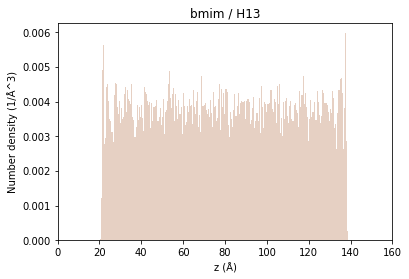

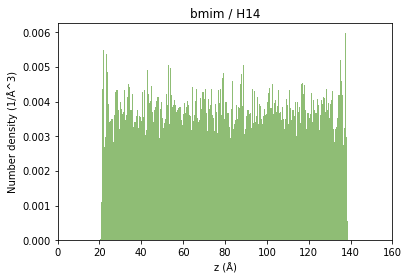

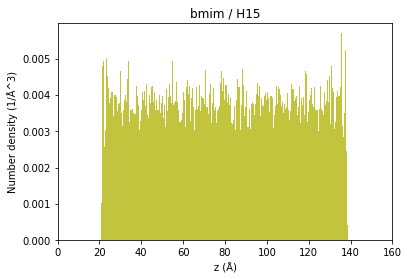

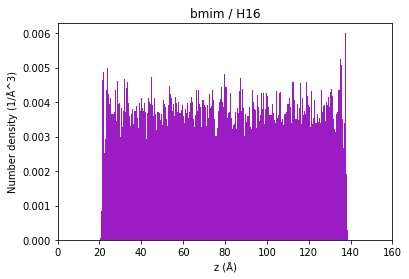

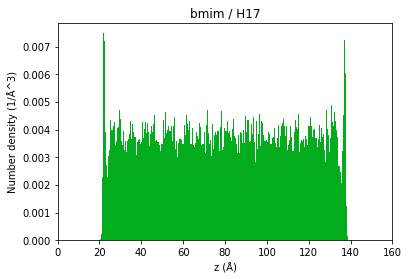

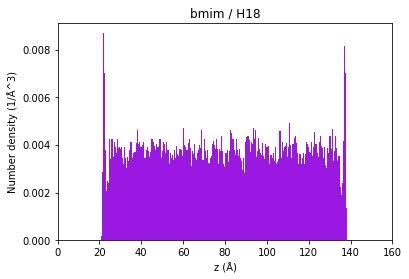

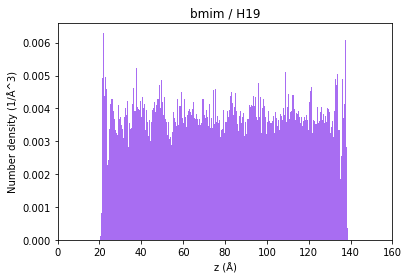

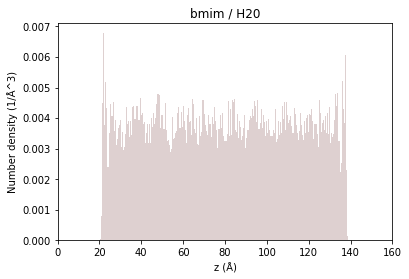

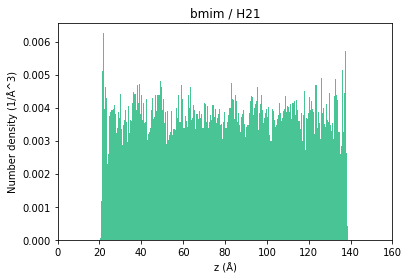

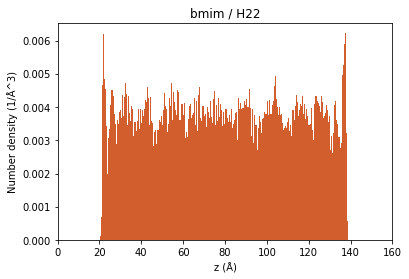

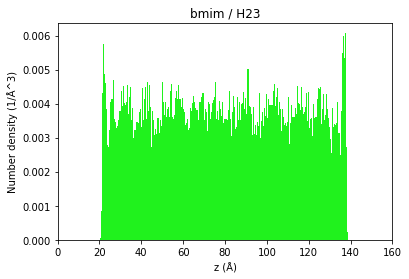

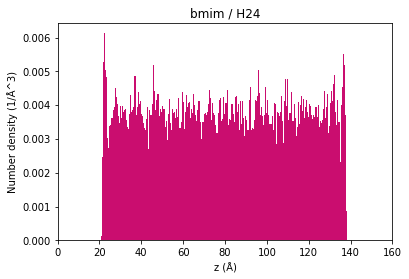

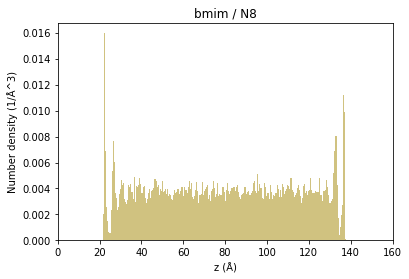

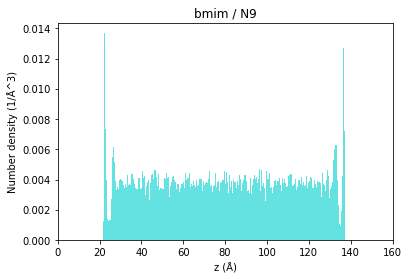

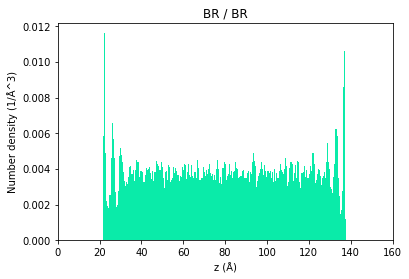

In [11]:
save_number_density_atom_types(number_density_atom_types_allframes, zbin_interval, show=True)

### Identifying the number density contributions of each atom type

There are four residues in the simulation, the two copper ones corresponding to the left and right electrodes, and the bromine one corresponding to a single atom. 

In [12]:
list_molecules(traj)

[('CU', 400), ('CU1', 400), ('BR', 1114), ('bmim', 1114)]

The molecule of interest is the 'bmim" which has 25 different atom types.

In [13]:
find_atom_types_elements(traj)

{'CU': {'CU': 'Cu'},
 'CU1': {'CU1': 'Cu'},
 'bmim': {'C1': 'C',
  'C10': 'C',
  'C2': 'C',
  'C3': 'C',
  'C4': 'C',
  'C5': 'C',
  'C6': 'C',
  'C7': 'C',
  'H': 'H',
  'H11': 'H',
  'H12': 'H',
  'H13': 'H',
  'H14': 'H',
  'H15': 'H',
  'H16': 'H',
  'H17': 'H',
  'H18': 'H',
  'H19': 'H',
  'H20': 'H',
  'H21': 'H',
  'H22': 'H',
  'H23': 'H',
  'H24': 'H',
  'N8': 'N',
  'N9': 'N'},
 'BR': {'BR': 'Br'}}

['bmim']
 PyMOL not running, entering library mode (experimental)


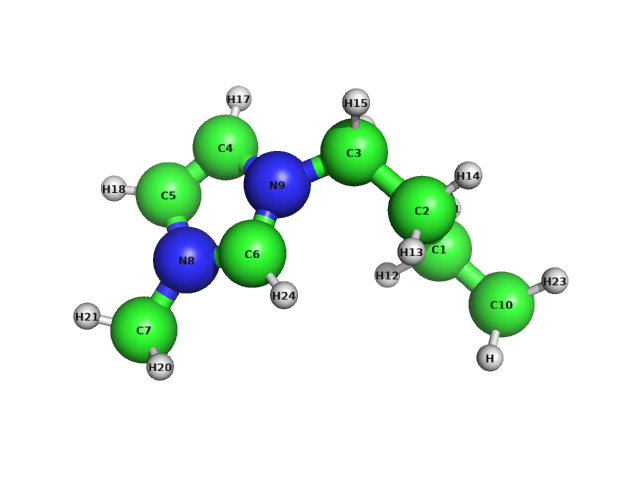

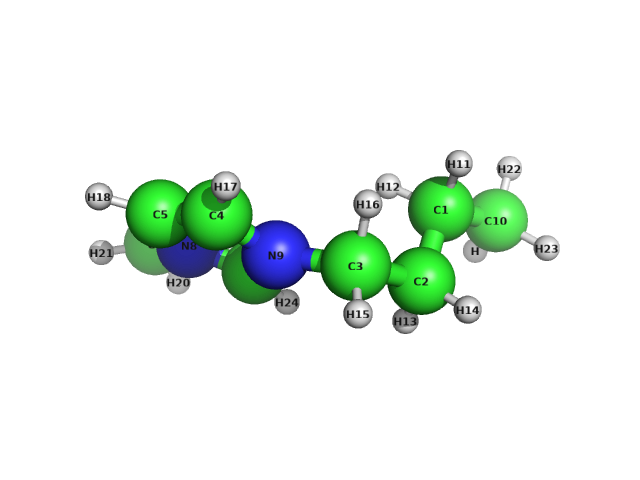

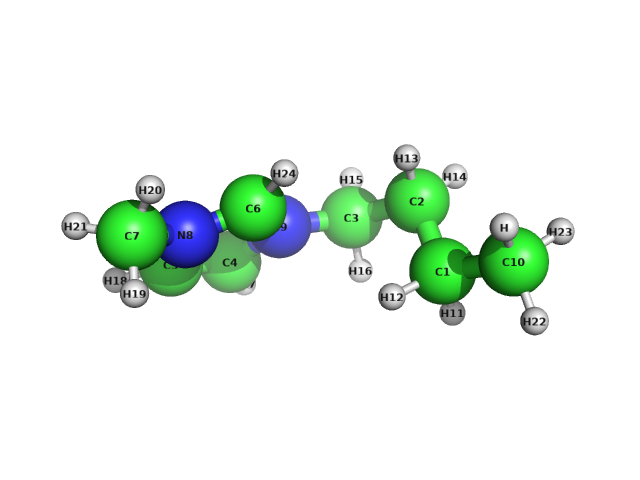

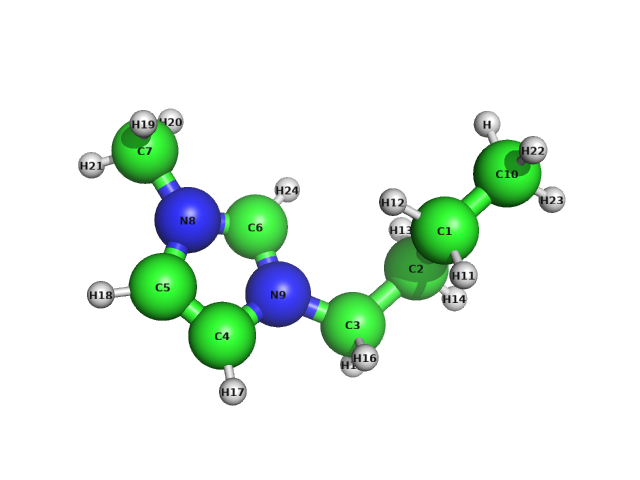

In [14]:
display_residues(traj, residues_to_find = ["bmim"])

----